<div style="text-align: right"> Karina Chiñas Fuentes </div>
<div style="text-align: right"> Matrikelnummer: 3578458 </div>
<div style="text-align: right"> 09/12/21 </div>

# Advanced Experimental Physics

In [1]:
import numpy as np
from numpy import pi as π
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

sp.init_printing(use_unicode=True)

## Heat Capacity: Exact expression for 1D system

Thermal Energy

$$
    U = \frac{\hbar L }{\pi\nu} \int^{\omega_D}_{0} \frac{\omega d\omega}{e^{\beta\hbar\omega} - 1}
$$

Heat Capacity

$$
    C = \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta} = \frac{1}{k_B T}\frac{\hbar^2 L}{\pi\nu}\int^{\omega_D}_{0} \frac{\omega^2 e^{\beta\hbar\omega} d\omega}{\left(e^{\beta\hbar\omega} - 1\right)^2}
$$

Heat Capacity per atom, given and change of variable:

$$
    \frac{C}{N} = \frac{1}{k_B^2 T^2}\frac{\hbar^3}{\Theta_D}\left(\frac{k_BT}{\hbar}\right)^3  \int^{\frac{\Theta_D}{T}}_{0} dx\frac{x^2e^x}{(e^x-1)^2}
$$

Thus:

$$
    C = Nk_B\left(\frac{T}{\Theta_D}\right)\int^{\frac{\Theta_D}{T}}_{0} dx\frac{x^2e^x}{(e^x-1)^2}
$$


For plotting purposes:

$$
    \frac{C}{Nk_B} = Ψ(\gamma) = \gamma \int^{\gamma^{-1}}_{0} dx\frac{x^2e^x}{(e^x-1)^2} 
$$

With $\gamma = T/\Theta_D$

In [2]:
def integrand(x):
    return (x*x*sp.exp(x))/((sp.exp(x)-1)**2)

[`quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html): Integrates a func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK. 

In [3]:
Ψ = lambda Γ: Γ*(quad(integrand, 0, Γ**-1)[0])
γ = np.linspace(0.1,2,100)
Ψ_sol = [Ψ(j) for j in γ]

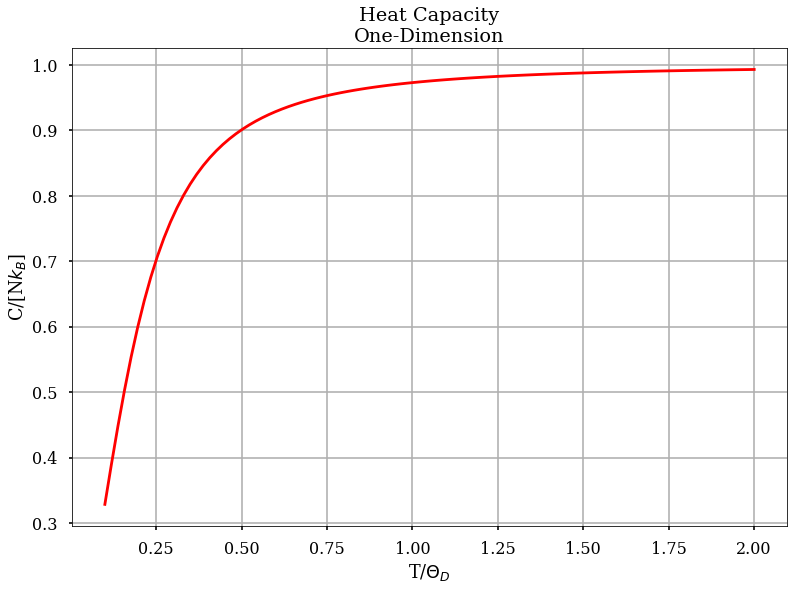

In [4]:
plt.title("Heat Capacity\nOne-Dimension")
plt.plot(γ,Ψ_sol, color='r')
plt.xlabel("T/$\\Theta_D$")
plt.ylabel("C/[N$k_B$]")
plt.grid()
plt.show()

##  Debye Temperature
Gold and Diamond

In [5]:
kB = 1.380649e-23    # J/K
ħ  = 1.054571817e-34 # Js

Θ_D = lambda ν,ρ: (ħ*ν/kB)*((6*π*π*ρ)**(1/3)) # K

In [6]:
# Gold (Χρυσός)

ρ_gold  = 19.3 # g/cm3
νl_gold = 2030e2 # cm/s
νt_gold = 1200e2 # cm/s

Θ_D(νl_gold,ρ_gold), Θ_D(νt_gold,ρ_gold), Θ_D(νl_gold+νt_gold,ρ_gold) 

In [7]:
# Diamond (Διαμάντι)

ρ_diamond  = 3.52 # g/cm3
νl_diamond = 18210e2 # cm/s
νt_diamond = 12300e2 # cm/s

Θ_D(νl_diamond,ρ_diamond), Θ_D(νt_diamond,ρ_diamond), Θ_D(νl_diamond+νt_diamond,ρ_diamond) 